In [2]:
%load_ext autoreload
%autoreload 2

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

In [ ]:
def bayes_estimate(prior, likelihood, evidence):
    return prior * likelihood / evidence

### Process Self Consitency results

In [78]:
results = pd.read_json('../../eval_results/30-04-2023_144720_ChikChirik_reduced_gsm_acc80.27.chat.jsonl', lines=True)

In [82]:
results.drop(columns=['prev_answer', 'prev_generation', 'prev_code_error', 'type_error'], inplace=True)

In [119]:
def concat_pal_generation(a):    
    r = ""
    for line in a:
        r += '\n' + line 
    return r

In [125]:
results.pal_generation = results.pal_generation.apply(lambda x: [concat_pal_generation(solution) for solution in x[0]])

In [147]:
results.cp_results = results.cp_results.apply(lambda x: [float(y) for y in x])

In [151]:
results.rename({'prev_score':'original_pal_score'}, axis=1, inplace=True)

In [153]:
results.to_json('../../eval_results/reduced_gsm_selfcons_acc80.27.chat.jsonl', orient='records', lines=True)

In [154]:
results

,input,target,original_pal_score,answer,score,pal_generation,pal_code_error,cp_generation,pal_results,cp_results,final_result_list
0,Gloria is shoe shopping when she comes across ...,104,0,104.0,1,"[\n\ndef solution():\n """"""Gloria is shoe sh...","[None, None, None, None, None, None, None, Non...","[If one pair of heels costs $33, then the othe...","[94, 94, 94, 94, 94, 94, 94, 104, 94, 104, 94,...","[104.0, 104.0, 104.0, 104.0, 104.0, 104.0, 104...","[94.0, 94.0, 94.0, 94.0, 94.0, 94.0, 94.0, 104..."
1,Marilyn's first record sold 10 times as many c...,8000,0,8000.0,1,"[\n\ndef solution():\n """"""Marilyn's first r...","[None, None, local variable 'harald_copies' re...",[Let H be the number of copies Harald sold.\nT...,"[8000.0, 80000.0, 8000.0, 80000.0, 8000.0, 800...","[8000.0, 8000.0, 8000.0, 8000.0, 8000.0, 8000....","[8000.0, 80000.0, 8000.0, 80000.0, 8000.0, 800..."
2,"Emily has 4 kids named Amy, Jackson, Corey, an...",4,0,4.0,1,"[\n\ndef solution():\n """"""Emily has 4 kids ...","[None, None, None, None, None, None, None, Non...",[If James is 10 and is 1 year younger than Cor...,"[4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, ...","[4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 8.0, 4.0, ...","[4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, ..."
3,Jerome had 4 friends who came to visit him on ...,175,0,175.0,1,"[\n\ndef solution():\n """"""Jerome had 4 frie...","[None, local variable 'friend4' referenced bef...",[The second friend pressed on the doorbell 1/4...,"[175.0, 175.0, 175.0, 175.0, 175.0, 175.0, 175.0]","[175.0, 175.0, 175.0, 175.0, 175.0, 175.0, 175...","[175.0, 175.0, 175.0, 175.0, 175.0, 175.0, 175..."
4,Frankie watches TV after he finishes his homew...,3,0,3.0,1,"[\n\ndef solution():\n """"""Frankie watches T...","[name 'x' is not defined, local variable 'x' r...",[Frankie watched a total of 1 hour x 2 nights ...,"[3.0, 3.0, 3.0, 3.0, 3, 3.0, 3, 3.0, 3.0, 3.0,...","[3.0, 4.0, 3.0, 3.0, 30.0, 3.0, 3.0, 3.0, 3.0,...","[3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, ..."
...,...,...,...,...,...,...,...,...,...,...,...
289,A cup of mushrooms weighs 100 grams and has 3 ...,42,1,42.0,1,"[\n\ndef solution():\n """"""A cup of mushroom...","[None, None, None, None, None, None, None, Non...","[John eats 200 grams of mushrooms every day, s...","[42.0, 42.0, 42.0, 42.0, 42.0, 42.0, 42.0, 42....","[42.0, 42.0, 42.0, 42.0, 42.0, 42.0, 42.0, 42....","[42.0, 42.0, 42.0, 42.0, 42.0, 42.0, 42.0, 42...."
290,"While working at the restaurant, each of the f...",1520,1,1520.0,1,"[\n\ndef solution():\n """"""While working at ...","[None, None, None, None, None, None, None, Non...",[Rafaela received $20 from each of the 40 cust...,"[1520.0, 1520.0, 1520.0, 1520.0, 1520.0, 1520....","[1520.0, 1520.0, 1520.0, 1520.0, 1520.0, 1520....","[1520.0, 1520.0, 1520.0, 1520.0, 1520.0, 1520...."
291,John rents his car out 10 times a month for 3 ...,250,1,250.0,1,"[\n\ndef solution():\n """"""John rents his ca...","[None, None, None, None, None, None, None, Non...",[John rents out his car for a total of 10 * 3 ...,"[250, 250, 250, 250, 250, 250, 250, 250, 250, ...","[250.0, 250.0, 250.0, 250.0, 250.0, 250.0, 250...","[250.0, 250.0, 250.0, 250.0, 250.0, 250.0, 250..."
292,Frankie and Binkie went bowling together. Fra...,195,1,195.0,1,"[\n\ndef solution():\n """"""Frankie and Binki...","[None, None, None, None, None, None, None, Non...",[Twice Binkie's score is 90*2=<<90*2=180>>180\...,"[195, 195, 195, 195, 195, 195, 195, 195, 195, ...","[195.0, 195.0, 195.0, 195.0, 195.0, 195.0, 195...","[195.0, 195.0, 195.0, 195.0, 195.0, 195.0, 195..."


### Analyse Self Consistency

TODO interesting stats


consistency vs score (how do they correlate)

PAL self cons boot strapped vs cp_resutls boot strapped vs combined 

at least one of answers correct



In [2]:
results = pd.read_json('../../eval_results/reduced_gsm_selfcons_acc80.27.chat.jsonl', lines=True)

In [3]:
results

,input,target,original_pal_score,answer,score,pal_generation,pal_code_error,cp_generation,pal_results,cp_results,final_result_list
0,Gloria is shoe shopping when she comes across ...,104,0,104.0,1,"[\n\ndef solution():\n """"""Gloria is shoe sh...","[None, None, None, None, None, None, None, Non...","[If one pair of heels costs $33, then the othe...","[94, 94, 94, 94, 94, 94, 94, 104, 94, 104, 94,...","[104.0, 104.0, 104.0, 104.0, 104.0, 104.0, 104...","[94.0, 94.0, 94.0, 94.0, 94.0, 94.0, 94.0, 104..."
1,Marilyn's first record sold 10 times as many c...,8000,0,8000.0,1,"[\n\ndef solution():\n """"""Marilyn's first r...","[None, None, local variable 'harald_copies' re...",[Let H be the number of copies Harald sold.\nT...,"[8000.0, 80000.0, 8000.0, 80000.0, 8000.0, 800...","[8000.0, 8000.0, 8000.0, 8000.0, 8000.0, 8000....","[8000.0, 80000.0, 8000.0, 80000.0, 8000.0, 800..."
2,"Emily has 4 kids named Amy, Jackson, Corey, an...",4,0,4.0,1,"[\n\ndef solution():\n """"""Emily has 4 kids ...","[None, None, None, None, None, None, None, Non...",[If James is 10 and is 1 year younger than Cor...,"[4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, ...","[4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 8.0, 4.0, ...","[4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, ..."
3,Jerome had 4 friends who came to visit him on ...,175,0,175.0,1,"[\n\ndef solution():\n """"""Jerome had 4 frie...","[None, local variable 'friend4' referenced bef...",[The second friend pressed on the doorbell 1/4...,"[175.0, 175.0, 175.0, 175.0, 175.0, 175.0, 175.0]","[175.0, 175.0, 175.0, 175.0, 175.0, 175.0, 175...","[175.0, 175.0, 175.0, 175.0, 175.0, 175.0, 175..."
4,Frankie watches TV after he finishes his homew...,3,0,3.0,1,"[\n\ndef solution():\n """"""Frankie watches T...","[name 'x' is not defined, local variable 'x' r...",[Frankie watched a total of 1 hour x 2 nights ...,"[3.0, 3.0, 3.0, 3.0, 3, 3.0, 3, 3.0, 3.0, 3.0,...","[3.0, 4.0, 3.0, 3.0, 30.0, 3.0, 3.0, 3.0, 3.0,...","[3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, ..."
...,...,...,...,...,...,...,...,...,...,...,...
289,A cup of mushrooms weighs 100 grams and has 3 ...,42,1,42.0,1,"[\n\ndef solution():\n """"""A cup of mushroom...","[None, None, None, None, None, None, None, Non...","[John eats 200 grams of mushrooms every day, s...","[42.0, 42.0, 42.0, 42.0, 42.0, 42.0, 42.0, 42....","[42.0, 42.0, 42.0, 42.0, 42.0, 42.0, 42.0, 42....","[42.0, 42.0, 42.0, 42.0, 42.0, 42.0, 42.0, 42...."
290,"While working at the restaurant, each of the f...",1520,1,1520.0,1,"[\n\ndef solution():\n """"""While working at ...","[None, None, None, None, None, None, None, Non...",[Rafaela received $20 from each of the 40 cust...,"[1520.0, 1520.0, 1520.0, 1520.0, 1520.0, 1520....","[1520.0, 1520.0, 1520.0, 1520.0, 1520.0, 1520....","[1520.0, 1520.0, 1520.0, 1520.0, 1520.0, 1520...."
291,John rents his car out 10 times a month for 3 ...,250,1,250.0,1,"[\n\ndef solution():\n """"""John rents his ca...","[None, None, None, None, None, None, None, Non...",[John rents out his car for a total of 10 * 3 ...,"[250, 250, 250, 250, 250, 250, 250, 250, 250, ...","[250.0, 250.0, 250.0, 250.0, 250.0, 250.0, 250...","[250.0, 250.0, 250.0, 250.0, 250.0, 250.0, 250..."
292,Frankie and Binkie went bowling together. Fra...,195,1,195.0,1,"[\n\ndef solution():\n """"""Frankie and Binki...","[None, None, None, None, None, None, None, Non...",[Twice Binkie's score is 90*2=<<90*2=180>>180\...,"[195, 195, 195, 195, 195, 195, 195, 195, 195, ...","[195.0, 195.0, 195.0, 195.0, 195.0, 195.0, 195...","[195.0, 195.0, 195.0, 195.0, 195.0, 195.0, 195..."


In [4]:
#P(selfcons == 1) = P(selfcons == 1|original_pal_score == 1)P(original_pal_score == 1) + P(selfcons == 1|original_pal_score == 0)P(original_pal_score == 0) Bayes rule
results[results.original_pal_score == 1].score.mean() * 0.7763 + results[results.original_pal_score == 0].score.mean() * (1 - 0.7763)

0.9004598639455782

In [110]:
#consistency/confidence = count of most common answer / total number of results
results['total_confidence'] = results.apply(lambda x: sum([1 if y == x['answer'] else 0 for y in x['final_result_list']]) / len(x['final_result_list']), axis=1)

In [140]:
#accuracy on at least one correct result in the list
results['at_least_one'] = results.apply(lambda x: int(sum([1 if y == x['target'] else 0 for y in x['final_result_list']]) > 0), axis=1)

In [82]:
results['real_pal_results'] = results.pal_results.apply(lambda x: [y for y in x if type(y) != type([])])

In [85]:
results['pal_self_cons'] = results.apply(lambda x: 0 if len(x['real_pal_results']) == 0 else int(max(set(x['real_pal_results']), key=x['real_pal_results'].count) == x['target']), axis=1)

In [89]:
results['cp_self_cons'] = results.apply(lambda x: int(max(set(x['cp_results']), key=x['cp_results'].count) == x['target']), axis=1)

In [97]:
print(f"PAL self consistency at most 20 samples: {results.pal_self_cons.mean()}")
print(f"Complex prompt self consistency at most 20 samples: {results.cp_self_cons.mean()}")
print(f"PAL + Complex Prompt self consistency at most 40 samples: {results.score.mean()}")

PAL self consistency at most 20 samples: 0.6802721088435374
Complex prompt self consistency at most 20 samples: 0.8299319727891157
PAL + Complex Prompt self consistency at most 40 samples: 0.8027210884353742


In [123]:
print(f"Original PAL score == 1 & PAL self cons score == 1: {results[results.original_pal_score == 1].pal_self_cons.mean()}")
print(f"Original PAL score == 0 & PAL self cons score == 1: {results[results.original_pal_score == 0].pal_self_cons.mean()}")

print(f"Original PAL score == 1 & Complex Prompt self cons score == 1: {results[results.original_pal_score == 1].cp_self_cons.mean()}")
print(f"Original PAL score == 0 & Complex Prompt self cons score == 1: {results[results.original_pal_score == 0].cp_self_cons.mean()}")

print(f"Original PAL score == 1 & PAL + Complex Prompt self cons score == 1: {results[results.original_pal_score == 1].score.mean()}")
print(f"Original PAL score == 0 & PAL + Complex Prompt self cons score == 1: {results[results.original_pal_score == 0].score.mean()}")

Original PAL score == 1 & PAL self cons score == 1: 0.9591836734693877
Original PAL score == 0 & PAL self cons score == 1: 0.4013605442176871
Original PAL score == 1 & Complex Prompt self cons score == 1: 0.9455782312925171
Original PAL score == 0 & Complex Prompt self cons score == 1: 0.7142857142857143
Original PAL score == 1 & PAL + Complex Prompt self cons score == 1: 0.9795918367346939
Original PAL score == 0 & PAL + Complex Prompt self cons score == 1: 0.6258503401360545


In [105]:
def get_pal_confidence(x):
    if len(x['real_pal_results']) == 0:
        return 0
    else:
        most_common_answer = max(set(x['real_pal_results']), key=x['real_pal_results'].count)
        return sum([1 if y == most_common_answer else 0 for y in x['real_pal_results']]) / len(x['real_pal_results'])

results['pal_confidence'] = results.apply(lambda x: get_pal_confidence(x), axis=1)

In [113]:
def get_cp_confidence(x):
    if len(x['cp_results']) == 0:
        return 0
    else:
        most_common_answer = max(set(x['cp_results']), key=x['cp_results'].count)
        return sum([1 if y == most_common_answer else 0 for y in x['cp_results']]) / len(x['cp_results'])

results['cp_confidence'] = results.apply(lambda x: get_cp_confidence(x), axis=1)

In [136]:
results

,input,target,original_pal_score,answer,score,pal_generation,pal_code_error,cp_generation,pal_results,cp_results,final_result_list,real_pal_results,pal_self_cons,cp_self_cons,pal_confidence,total_confidence,cp_confidence
0,Gloria is shoe shopping when she comes across ...,104,0,104.0,1,"[\n\ndef solution():\n """"""Gloria is shoe sh...","[None, None, None, None, None, None, None, Non...","[If one pair of heels costs $33, then the othe...","[94, 94, 94, 94, 94, 94, 94, 104, 94, 104, 94,...","[104.0, 104.0, 104.0, 104.0, 104.0, 104.0, 104...","[94.0, 94.0, 94.0, 94.0, 94.0, 94.0, 94.0, 104...","[94, 94, 94, 94, 94, 94, 94, 104, 94, 104, 94,...",0,1,0.800000,0.600000,1.00
1,Marilyn's first record sold 10 times as many c...,8000,0,8000.0,1,"[\n\ndef solution():\n """"""Marilyn's first r...","[None, None, local variable 'harald_copies' re...",[Let H be the number of copies Harald sold.\nT...,"[8000.0, 80000.0, 8000.0, 80000.0, 8000.0, 800...","[8000.0, 8000.0, 8000.0, 8000.0, 8000.0, 8000....","[8000.0, 80000.0, 8000.0, 80000.0, 8000.0, 800...","[8000.0, 80000.0, 8000.0, 80000.0, 8000.0, 800...",1,1,0.846154,0.939394,1.00
2,"Emily has 4 kids named Amy, Jackson, Corey, an...",4,0,4.0,1,"[\n\ndef solution():\n """"""Emily has 4 kids ...","[None, None, None, None, None, None, None, Non...",[If James is 10 and is 1 year younger than Cor...,"[4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, ...","[4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 8.0, 4.0, ...","[4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, ...","[4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, ...",1,1,1.000000,0.950000,0.90
3,Jerome had 4 friends who came to visit him on ...,175,0,175.0,1,"[\n\ndef solution():\n """"""Jerome had 4 frie...","[None, local variable 'friend4' referenced bef...",[The second friend pressed on the doorbell 1/4...,"[175.0, 175.0, 175.0, 175.0, 175.0, 175.0, 175.0]","[175.0, 175.0, 175.0, 175.0, 175.0, 175.0, 175...","[175.0, 175.0, 175.0, 175.0, 175.0, 175.0, 175...","[175.0, 175.0, 175.0, 175.0, 175.0, 175.0, 175.0]",1,1,1.000000,0.962963,0.95
4,Frankie watches TV after he finishes his homew...,3,0,3.0,1,"[\n\ndef solution():\n """"""Frankie watches T...","[name 'x' is not defined, local variable 'x' r...",[Frankie watched a total of 1 hour x 2 nights ...,"[3.0, 3.0, 3.0, 3.0, 3, 3.0, 3, 3.0, 3.0, 3.0,...","[3.0, 4.0, 3.0, 3.0, 30.0, 3.0, 3.0, 3.0, 3.0,...","[3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, ...","[3.0, 3.0, 3.0, 3.0, 3, 3.0, 3, 3.0, 3.0, 3.0,...",1,1,0.933333,0.771429,0.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,A cup of mushrooms weighs 100 grams and has 3 ...,42,1,42.0,1,"[\n\ndef solution():\n """"""A cup of mushroom...","[None, None, None, None, None, None, None, Non...","[John eats 200 grams of mushrooms every day, s...","[42.0, 42.0, 42.0, 42.0, 42.0, 42.0, 42.0, 42....","[42.0, 42.0, 42.0, 42.0, 42.0, 42.0, 42.0, 42....","[42.0, 42.0, 42.0, 42.0, 42.0, 42.0, 42.0, 42....","[42.0, 42.0, 42.0, 42.0, 42.0, 42.0, 42.0, 42....",1,1,0.950000,0.975000,1.00
290,"While working at the restaurant, each of the f...",1520,1,1520.0,1,"[\n\ndef solution():\n """"""While working at ...","[None, None, None, None, None, None, None, Non...",[Rafaela received $20 from each of the 40 cust...,"[1520.0, 1520.0, 1520.0, 1520.0, 1520.0, 1520....","[1520.0, 1520.0, 1520.0, 1520.0, 1520.0, 1520....","[1520.0, 1520.0, 1520.0, 1520.0, 1520.0, 1520....","[1520.0, 1520.0, 1520.0, 1520.0, 1520.0, 1520....",1,1,1.000000,1.000000,1.00
291,John rents his car out 10 times a month for 3 ...,250,1,250.0,1,"[\n\ndef solution():\n """"""John rents his ca...","[None, None, None, None, None, None, None, Non...",[John rents out his car for a total of 10 * 3 ...,"[250, 250, 250, 250, 250, 250, 250, 250, 250, ...","[250.0, 250.0, 250.0, 250.0, 250.0, 250.0, 250...","[250.0, 250.0, 250.0, 250.0, 250.0, 250.0, 250...","[250, 250, 250, 250, 250, 250, 250, 250, 250, ...",1,1,1.000000,1.000000,1.00
292,Frankie and Binkie went bowling together. Fra...,195,1,

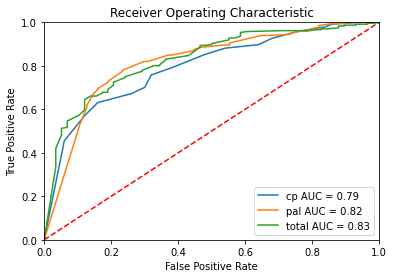

In [137]:
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')

for column in ['cp', 'pal', 'total']:
    preds = results[column + '_confidence']
    if column == 'total':
        fpr, tpr, threshold = metrics.roc_curve(results.score, preds)
    else:
        fpr, tpr, threshold = metrics.roc_curve(results[column + "_self_cons"], preds)
    roc_auc = metrics.auc(fpr, tpr)
    plt.plot(fpr, tpr, label = column + ' AUC = %0.2f' % roc_auc)


plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [143]:
results['correct/all'] = results.apply(lambda x: sum([1 if y == x['target'] else 0 for y in x['final_result_list']]) / len(x['final_result_list']), axis=1)

(array([ 23.,  11.,  20.,  15.,  15.,  33.,  16.,  12.,  27., 122.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

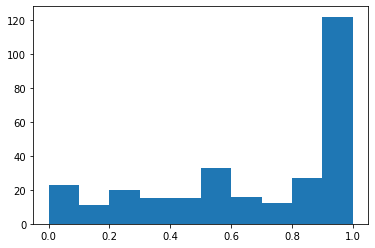

In [163]:
plt.hist(results['correct/all'])

In [164]:
results[results['correct/all'] == 0]

,input,target,original_pal_score,answer,score,pal_generation,pal_code_error,cp_generation,pal_results,cp_results,final_result_list,real_pal_results,pal_self_cons,cp_self_cons,pal_confidence,total_confidence,cp_confidence,correct/all
28,Jordan wanted to surprise her mom with a homem...,2,0,0.0,0,"[\n\ndef solution():\n """"""Jordan wanted to ...","[None, None, invalid literal for int() with ba...",[Jordan needs to budget time for making the ca...,"[5:30 pm, 3:20 pm, 5:00 pm, 14:00 pm, 1:60 pm,...","[10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 40.0, 0.0, 0.0...","[840.0, 840.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[5:30 pm, 3:20 pm, 5:00 pm, 14:00 pm, 1:60 pm,...",0,0,0.125,0.727273,0.80,0.0
39,"At Allan's house, there is twice as much corn ...",200,0,180.0,0,"[\n\ndef solution():\n """"""At Allan's house,...","[None, None, None, None, None, None, None, Non...","[Allan has twice as many corns as cannolis, me...","[180, 180, 180, 180, 180, 180, 180, 180, 180, ...","[260.0, 140.0, 140.0, 220.0, 180.0, 220.0, 180...","[180.0, 180.0, 180.0, 180.0, 180.0, 180.0, 180...","[180, 180, 180, 180, 180, 180, 180, 180, 180, ...",0,0,1.000,0.600000,0.35,0.0
47,Marin and his neighbor Nancy each eat 4 apples...,150,0,240.0,0,"[\n\ndef solution():\n """"""Marin and his nei...","[None, None, None, None, None, None, None, Non...","[Marin and Nancy each eat 4 apples a day, so t...","[240, 240, 240, 240, 240, 240, 240, 240, 240, ...","[240.0, 240.0, 240.0, 240.0, 240.0, 240.0, 240...","[240.0, 240.0, 240.0, 240.0, 240.0, 240.0, 240...","[240, 240, 240, 240, 240, 240, 240, 240, 240, ...",0,0,1.000,1.000000,1.00,0.0
90,"After scoring 14 points, Erin now has three ti...",18,0,38.0,0,"[\n\ndef solution():\n """"""After scoring 14 ...","[None, None, None, None, None, None, None, Non...","[Erin has three times more points than Sara, s...","[38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 3...","[24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24....","[38.0, 38.0, 38.0, 38.0, 38.0, 38.0, 38.0, 38....","[38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 3...",0,0,1.000,0.500000,0.95,0.0
108,Sasha and Julie are best friends playing on op...,14,0,18.0,0,"[\n\ndef solution():\n """"""Sasha and Julie a...","[None, None, None, None, None, None, None, Non...","[In the first game, Julie scored 4 fewer point...","[18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 1...","[18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18....","[18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18....","[18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 1...",0,0,1.000,1.000000,1.00,0.0


In [160]:
results[results['correct/all'] == 0].iloc[4].input

"Sasha and Julie are best friends playing on opposing basketball teams. The teams have two practice games scheduled. In the first game, Sasha had the home court advantage and scored 14 points. Julie scored 4 fewer points than Sasha in the same game. Sasha always struggles during away games and their second match was at Julie's home court. Sasha scored 6 fewer points in the second game than Julie's score in the first game. How many total points did Sasha score during both games?"

In [152]:
results[results['correct/all'] == 0].iloc[1].cp_generation

['Allan has twice as many corns as cannolis, meaning he has 2*40 = <<2*40=80>>80 corns in his house.\nAllan bought 60 more cannolis at the store, meaning he now has 40+60 = <<40+60=100>>100 cannolis in his house.\nAllan also bought 40 fewer corns than the number of cannolis, meaning he bought 80-40 = <<80-40=40>>40 corns at the store.\nThe total number of cannolis Allan has is 100+40 = <<100+40=140>>140 cannolis.\nThe total number of corns Allan has is 80+40 = <<80+40=120>>120 corns.\nThe combined total of the number of corns and cannolis Allan has in the house is 140+120 = <<140+120=260>>260.\nThe answer is 260.',
 "If there are 40 cannolis in Allan's house, and there is twice as much corn as cannolis, then there are 40*2 = 80 corns in his house.\nAllan bought 60 more cannolis at the store, so he now has 40+60 = 100 cannolis.\nHe also bought 40 fewer corns than the number of cannolis, so he bought 100-40 = 60 corns.\nThe total number of cannolis now in Allan's house is 40+60 = 100 can

In [34]:
with open('./degraded_results_least_to_most.txt', 'w') as f:
    for i, row in degraded.iterrows():
        f.write(f'{row.input}\ntarget:{row.target}\nanswer:{row.answer}\n{row.generation[0]}\n\n')